## Data Cleaning & Tidy Process

In [ ]:
# Applying the data cleaning concepts 
# Output the original untidy data frame

import pandas as pd

print("Original (untidy) Federal R&D budget data frame ")
df = pd.read_csv("Data/fed_rd_year&gdp.csv")
print(df)


# Melt the DataFrame: convert subject columns of years into a single 'year' column,
# with their corresponding budgets in a new 'Budget' column

df_melted = df.melt( id_vars = 'department', value_vars= df.columns, var_name = 'Year', value_name= 'RD_Budget')
#df_melted

# Using string splitting to separate the year from the budget
df_melted[['Year', 'GDP']] = df_melted['Year'].str.split(pat = '_', expand = True)


# Now cleaning up the 'GDP' column 
# Split the column into different variables: 'GDP' and 'RD_Budget'
df_melted['GDP'] = df_melted['GDP'].str.replace('gdp', '')

# Convert the 'GDP' column to numeric because it splitting the column has the number as an object
df_melted['GDP'] = df_melted['GDP'].astype(float)


Original (untidy) Federal R&D budget data frame 
   department  1976_gdp1790000000000.0  1977_gdp2028000000000.0  \
0         DHS                      NaN                      NaN   
1         DOC             8.190000e+08             8.370000e+08   
2         DOD             3.569600e+10             3.796700e+10   
3         DOE             1.088200e+10             1.374100e+10   
4         DOT             1.142000e+09             1.095000e+09   
5         EPA             9.680000e+08             9.660000e+08   
6         HHS             9.226000e+09             9.507000e+09   
7    Interior             1.152000e+09             1.082000e+09   
8        NASA             1.251300e+10             1.255300e+10   
9         NIH             8.025000e+09             8.214000e+09   
10        NSF             2.372000e+09             2.395000e+09   
11      Other             1.191000e+09             1.280000e+09   
12       USDA             1.837000e+09             1.796000e+09   
13         VA

### Tidy Data Frame

In [6]:
print("Tidy Federal R&D budget data frame ")
df_melted.head()

Tidy Federal R&D budget data frame 


,department,Year,RD_Budget,GDP
0,DHS,1976,NaN,1.790000e+12
1,DOC,1976,8.190000e+08,1.790000e+12
2,DOD,1976,3.569600e+10,1.790000e+12
3,DOE,1976,1.088200e+10,1.790000e+12
4,DOT,1976,1.142000e+09,1.790000e+12


## Creating Visualizations

### Total R&D Budget by Year Data Line Chart

Text(0, 0.5, 'Total R&D Budget(Hunnreds of Billions)')

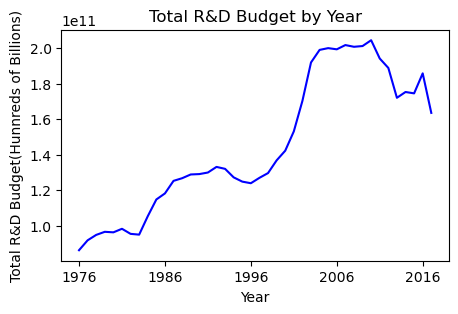

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Creating a sub data frame from the tidy data set that contains the summed R&D budget across all departments by year
# To group this datatogether, we use the groupby() method on the 'Year' column, and then sum() the 'RD_Budget' column
df_chart1 = df_melted.groupby('Year')[['RD_Budget']].sum().plot(kind = 'line', 
                                                    figsize= (5,3),
                                                    color = 'blue', 
                                                    title = 'Total R&D Budget by Year',
                                                    legend = False)
plt.xlabel("Year")
plt.ylabel('Total R&D Budget(Hunnreds of Billions)')


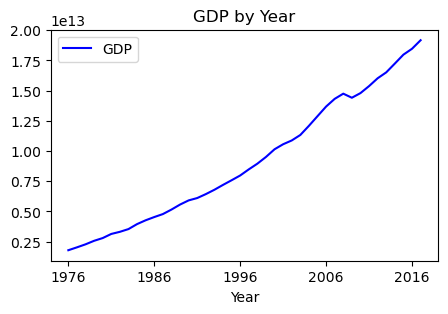

In [9]:
df_chart2 = df_melted.groupby('Year')[['GDP']].mean().plot(kind = 'line', 
                                                    figsize= (5,3),
                                                    color = 'blue', 
                                                    title = 'GDP by Year',
                                                    legend = True)

### Top 5 Departments with the largest average R&D budget

array([<Axes: >], dtype=object)

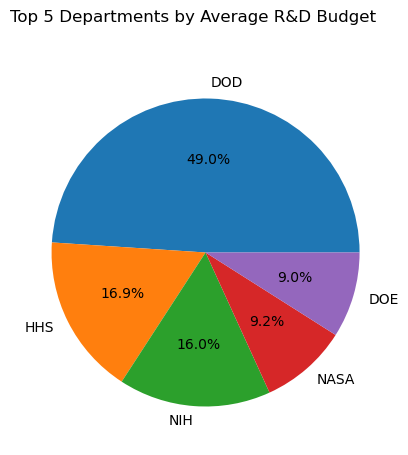

In [4]:
# Group the melted DataFrame by 'department'
# Select the 'RD_Budget' column
# Calculate the average R&D budget for each department
df_melted.groupby('department')[['RD_Budget']].mean().sort_values(by = 'RD_Budget', ascending = False).head(5).plot(kind = 'pie',
                                            subplots = True,
                                            figsize = (10, 5),
                                            title = 'Top 5 Departments by Average R&D Budget',
                                            legend= False,
                                            ylabel = '', 
                                            autopct='%.1f%%')


### Pivot Table

In [8]:
# Calculate the Year-over-Year (YoY) percentage change for R&D Budget
# using Pandas' `.pct_change()` method, which computes the percentage
# change between the current and previous row in the DataFrame
pivot_rd_year_dept = df_melted.pivot_table(
    values='RD_Budget', 
    index='department', 
    columns='Year', 
    aggfunc= 'mean').pct_change(axis = 'columns').round(2) *100
pivot_rd_year_dept

Year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
department,,,,,,,,,,,,,,,,,,,,,
DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,9.0,-20.0,-16.0,-38.0,40.0,48.0,-12.0,-37.0,22.0
DOC,NaN,2.0,4.0,9.0,-1.0,-12.0,-16.0,1.0,8.0,5.0,...,8.0,16.0,-5.0,-11.0,1.0,2.0,17.0,-3.0,8.0,5.0
DOD,NaN,6.0,-2.0,0.0,-0.0,13.0,12.0,9.0,14.0,11.0,...,1.0,-1.0,1.0,-6.0,-8.0,-13.0,-0.0,-1.0,8.0,-31.0
DOE,NaN,26.0,14.0,-0.0,-2.0,-3.0,-18.0,-8.0,5.0,3.0,...,6.0,4.0,4.0,-3.0,-1.0,-3.0,10.0,19.0,3.0,-3.0
DOT,NaN,-4.0,6.0,-13.0,4.0,-7.0,-28.0,14.0,27.0,-13.0,...,12.0,5.0,15.0,-13.0,-5.0,-13.0,-4.0,10.0,-2.0,3.0
EPA,NaN,-0.0,22.0,-6.0,-18.0,-0.0,-29.0,-22.0,3.0,19.0,...,-4.0,2.0,5.0,-4.0,-4.0,-8.0,-0.0,-4.0,-3.0,-5.0
HHS,NaN,3.0,11.0,-4.0,-1.0,-4.0,-8.0,6.0,8.0,9.0,...,-3.0,5.0,1.0,-4.0,-1.0,-7.0,1.0,-3.0,5.0,5.0
Interior,NaN,-6.0,4.0,5.0,-8.0,-9.0,-13.0,-4.0,-9.0,3.0,...,4.0,1.0,10.0,-4.0,6.0,-6.0,5.0,2.0,11.0,-5.0
NASA,NaN,0.0,-0.0,4.0,6.0,-4.0,-22.0,-43.0,6.0,15.0,...,-5.0,-22.0,4.0,-4.0,22.0,-4.0,5.0,-4.0,15.0,-10.0
